## import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 중간고사 관련 잡담 

### 중간고사 3번문제

`-` 특이한 모형 : 오버핏이 일어날 수 없는 모형이다.

`-` 회귀분석은 과적합이 안된다! $\to$ 알아서 $n$이 커질수록 유의미하지 않은 변수들을 거슬러줌
  * 모형이 스스로 변수에 `coffecient`에 대한 유의성 검정을 수행 따라서 과적합 이슈가 없다
  * keypoint : 무조건 변수가 많다고 과적합이 일어나지 않음
  * 빨강, 노랑, 파랑으로 모든 색깔을 표현 가능($\star\star\star$)

### 중간고사 1-(3)번 문제

## 경사하강법과 확률적경사하강법

* 확률적 경사하강법을 오늘부터 배울 거임!!

### ver1: 모든 샘플을 사용하여 slope계산 (Gradient decent)

* 기본까지 했던 방법

* 10개의 샘플을 관측!

(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

...

### ver2: 하나의 샘플만 사용하여 slope계산(stochastic gradient descent)

* (epoch이 3번이면 for문이 30번돌아감)

(epoch1) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

* 총 쏘는거 생각 : `ver2`는 동일한 총알이 주어졌을 때 그냥 막 쏘는거임
* 동일 **iteration** 대비 효율이 좋은 것은 `ver1`이다.
  * 왜냐 ver1의경우 `iteration == epoch`이기 때문!
* 동일 **epoch** 대비 효율이 좋은 것도 `ver1`이다.
* 정확도 또한 ver1이 더 높을 것이다. 그러나 이터레이셧 횟수는 ver2가 더 많을 것이다.
* ver1은 모든 샘플을 고려해 한번에 기울기를 계산(질로 승부), ver2는 양으로 승부하는 것이라고 생각한다.

### ver3: $m(\leq n)$개의 샘플만 사용하여 slope계산

$m=3$이라고 하자. 

(epoch1) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

* Ver 3의 겨우 파라미터 업데이트시 한번도 사용이 안되는 샘플이 존재할 수 가 있다.

### 용어의 정리 

#### 옛날 (좀 더 엄밀)

`-` ver1: gradient descent, batch gradient descent 


`-` ver2: stochastic gradient descent (확률적 경사 하강법)



`-` ver3: mini-batch gradient descent, mini-batch stochastic gradient descent

#### 요즘 

`-` ver1: gradient descent


`-` ver2: stochastic gradient descent with batch size = 1 

`-` ver3: stochastic gradient descent (확률적 경사하강법)
- https://www.deeplearningbook.org/contents/optimization.html, 알고리즘 8-1 참고. 

note: 이렇게 많이 쓰는 이유? ver1,2는 사실상 없는 방법이므로

### ver1,2,3 이외에 좀 더 지저분한 것들이 있다. 

`-` ver2,3에서 샘플을 셔플할 수도 있다. 

`-` ver3에서 일부 샘플이 학습에 참여 안하는 버전도 있다. 

`-` 개인적 생각: 크게3개정도만 알면 괜찮고 나머지는 그렇게 유의미하지 않아보인다. 

### Discussion 

`-` 핵심개념 
- **메모리사용량: ver1 > ver3 > ver2** (한번에 한개의 파라미터를  업데이트 할 때!!)
- 계산속도: ver1 > ver3 > ver2 (한번에 한개의 파라미터를  업데이트 할 때!!) 
- local-min에 갇힘: ver1> ver3 > ver2 (이건 알고리즘 구성의 차이)  
  * `ver1` 은 local-min을 잘 찾는다
  * `ver2`, `ver3`은 운좋게 `local-min`을 탈출한다

`-` 본질: GPU 메모리가 한정되어 있어서 ver1을 쓰지는 못한다. GPU 메모리를 가장 적게쓰는것은 ver2인데 이것은 너무 불안정하다. 

`-` 틀리진 않지만 어색한 블로그 정리 내용들 
- 경사하강법은 종종 국소최소점에 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다.(X)
  * 틀린말은 아니나 그것을 의도하고 만든 것은 아님, 가끔 그럴 때도 있는 것이지 확률적 경사하강법을 쓴다고 local_minimum에 빠지지 않는 것은 아니다.
- 경사하강법은 계산시간이 오래걸린다(O). 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다.(O)
  * 1회 업데이트는 빠르게 계산하나, 하지만 그것이 최적의 $\beta$를 빠르게 얻을 수 있는 것은 아님



* 결론
  * 확률적 경사하강법을 쓰는 이유는 메모리적 문제이다. 메모리를 아끼기 위해 우리는 `tf.Variable`을 이용한다. 그런데 `Gradient`를 계산하려면 `loss`를 계산해야 하고 샘플 `(y,yhat)`을 전부 메모리상에 올려야한다.
  * 위 같은 경우 GPU가 샘플의 일부만 올라갈 수 있다면 미니배치방법인 확률적 경사하강법을 사용해야기 때문에 확률적경사하강법을 우리가 사용하는 이유다.
  

## fashion_mnist 모듈 

### tf.keras.datasets.fashion_mnist.load_data()

In [4]:
type(tf.keras.datasets.fashion_mnist)

module

### 데이터생성 및 탐색

`-` tf.keras.datasets.fashion_mnist.load_data()를 이용한 데이터 생성 

In [5]:
type(tf.keras.datasets.fashion_mnist.load_data)

function

* `__call__` : 오브젝트가 숨겨져있음 $\to$ 괄호를 열고 닫으면 오브젝트가 생성됨

* `enter` 와 `exit`가 없으면 `with`를 같이 쓸 수 없음

In [ ]:
dir(tf.keras.datasets.fashion_mnist.load_data)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_keras_api_names',
 '_keras_api_names_v1']

In [7]:
tf.keras.datasets.fashion_mnist.load_data??

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

* 코드를 바로 뜯어보고 구글링은 최후 수단으로 하자

### 데이터구조 

In [12]:
#x_train[0] ## 첫번째 관측치

In [13]:
x_train[0].shape

(28, 28)

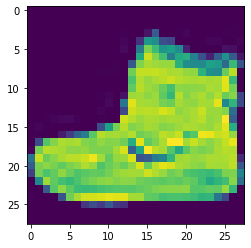

In [14]:
plt.imshow(x_train[0])

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
np.where(y_train==9)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)

* 오 왠지 11번째 데이터도 신발일 것 같에

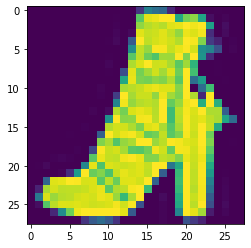

In [17]:
plt.imshow(x_train[11])

`-` $\bf{X} : (n,28,28)$


`-` $y$ : 각 이미지의 라벨 데이터

## 예제1

### 데이터 정리 

`-` $y=0,1$에 대응하는 이미지만 정리하자. (우리가 배운건 로지스틱이니깐)

In [22]:
y=y_train[(y_train == 0) | (y_train == 1)].reshape(-1,1)
yy= y_test[(y_test == 0) | (y_test == 1)].reshape(-1,1)

In [23]:
X=x_train[(y_train == 0) | (y_train == 1)]
XX= x_test[(y_test == 0) | (y_test== 1)]

In [ ]:
X.shape

(12000, 28, 28)

In [24]:
y.shape

(12000, 1)

In [25]:
28*28

784

In [26]:
X=x_train[(y_train == 0) | (y_train == 1)].reshape(-1,784)
XX= x_test[(y_test == 0) | (y_test== 1)].reshape(-1,784)

In [27]:
X.shape,XX.shape

((12000, 784), (2000, 784))

### 풀이1: 은닉층을 포함한 신경망  // epochs=100

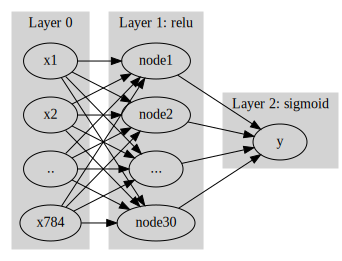

In [28]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: sigmoid"
}
''')

In [29]:
tf.random.set_seed(43052)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='sgd',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000,verbose=0) 

* `loss`는 미분하기위한 정보지 성능에 대한 정보는 아니다.

* `train`

In [30]:
np.mean((net(X)>0.5) == y.reshape(12000,1))

0.5000833333333333

* `test`

In [31]:
np.mean((net(XX)>0.5) == yy.reshape(2000,1))

0.5

* `local_min`에 빠져서 못 나오는 것임(verbose=1로하고 loss를 살펴볼 줄 알아야한다)

* `초기값` 문제가 아닌 옵티마이저의 문제임$(\star\star\star)$

### 풀이2: 옵티마이저 개선

In [32]:
tf.random.set_seed(43051)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy)
net.fit(X,y,epochs=100,batch_size=12000,verbose=0) 

In [33]:
np.mean((net(X)>0.5) == y.reshape(12000,1))

0.9919166666666667

In [34]:
np.mean((net(XX)>0.5) == yy.reshape(2000,1))

0.9855

### 풀이3: 컴파일시 metrics=['accuracy'] 추가

In [35]:
tf.random.set_seed(43055)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 486ms/step - loss: 100.9425 - accuracy: 0.4988
Epoch 2/100
1/1 [==============================] - 0s 82ms/step - loss: 44.4441 - accuracy: 0.3741
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 29.2322 - accuracy: 0.4321
Epoch 4/100
1/1 [==============================] - 0s 109ms/step - loss: 22.6921 - accuracy: 0.5399
Epoch 5/100
1/1 [==============================] - 0s 69ms/step - loss: 8.7741 - accuracy: 0.7321
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 4.6409 - accuracy: 0.8516
Epoch 7/100
1/1 [==============================] - 0s 65ms/step - loss: 5.2642 - accuracy: 0.8711
Epoch 8/100
1/1 [==============================] - 0s 69ms/step - loss: 6.1993 - accuracy: 0.8771
Epoch 9/100
1/1 [==============================] - 0s 66ms/step - loss: 6.5543 - accuracy: 0.8845
Epoch 10/100
1/1 [==============================] - 0s 68ms/step - loss: 6.3454 - accuracy: 0.8953
Epoch 11/100

In [36]:
net.evaluate(X,y)

375/375 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9918


[0.10858089476823807, 0.9917500019073486]

In [37]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9800


[0.2932808995246887, 0.9800000190734863]

### 풀이4: 확률적경사하강법 이용 // epochs=10 (Ver2)

In [40]:
tf.random.set_seed(43052)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=10,batch_size=120) 

Epoch 1/10
100/100 [==============================] - 1s 3ms/step - loss: 5.6484 - accuracy: 0.9418
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5078 - accuracy: 0.9793
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.9818
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.9828
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2474 - accuracy: 0.9857
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9870
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9889
Epoch 8/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9899
Epoch 9/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9891
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9915

In [41]:
net.evaluate(X,y)

375/375 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9933


[0.08887288719415665, 0.9932500123977661]

In [42]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9845


[0.2972556948661804, 0.984499990940094]

* 풀이 4는 정확도가 초기값이 너무 좋음
* 왜 업데이트를 한번의 에폭에서 현재 100번을 수행했기 때문!!
* 배치사이즈는 보통 메모리에 맞추어 올린다